### Vaccine Rate and Ethnicity Groups

**Question**: Is there a significant difference between vaccination rates between ethnicity groups?

In [2]:
import numpy as np
import pandas as pd
import requests
import sqlalchemy as sqla

In [19]:
# Request hesitancy data
hesitancy_endpoint = 'https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=4000'
r = requests.get(hesitancy_endpoint)

hesitancy_df = pd.DataFrame(r.json())
hesitancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   fips_code                      3142 non-null   object
 1   county_name                    3142 non-null   object
 2   state                          3142 non-null   object
 3   estimated_hesitant             3142 non-null   object
 4   estimated_hesitant_or_unsure   3142 non-null   object
 5   estimated_strongly_hesitant    3142 non-null   object
 6   social_vulnerability_index     3141 non-null   object
 7   svi_category                   3141 non-null   object
 8   ability_to_handle_a_covid      3142 non-null   object
 9   cvac_category                  3142 non-null   object
 10  percent_adults_fully           2864 non-null   object
 11  percent_hispanic               3142 non-null   object
 12  percent_non_hispanic_american  3142 non-null   object
 13  per

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Here, I delete the last two columns of the df as they're unecessary for this analysis
hesitancy_df = hesitancy_df.iloc[: , :-2]

# Then, I change these columns from objects to float to compute arithmetic operations
hesitancy_df['percent_hispanic'] = hesitancy_df['percent_hispanic'].astype(float)
hesitancy_df['percent_non_hispanic_american'] = hesitancy_df['percent_non_hispanic_american'].astype(float)
hesitancy_df['percent_non_hispanic_asian'] = hesitancy_df['percent_non_hispanic_asian'].astype(float)
hesitancy_df['percent_non_hispanic_black'] = hesitancy_df['percent_non_hispanic_black'].astype(float)
hesitancy_df['percent_non_hispanic_native'] = hesitancy_df['percent_non_hispanic_native'].astype(float)
hesitancy_df['percent_non_hispanic_white'] = hesitancy_df['percent_non_hispanic_white'].astype(float)

In [21]:
# Here, I find the average vaccination rate between the ethnicity groups across all counties and states 
ave_df = pd.DataFrame(hesitancy_df.mean(axis=0))
ave_df = ave_df.iloc[1: , :]
ave_df = ave_df.rename(columns={0: "Average Vaccine Rate"})
ave_df = ave_df.sort_values(by=['Average Vaccine Rate'])
new_ave = ave_df.reset_index()
new_ave = new_ave.rename(columns={"index": "Ethnicity Group"})
new_ave

,Ethnicity Group,Average Vaccine Rate
0,percent_non_hispanic_native,0.000919
1,percent_non_hispanic_asian,0.013621
2,percent_non_hispanic_american,0.018463
3,percent_non_hispanic_black,0.089259
4,percent_hispanic,0.094184
5,percent_non_hispanic_white,0.762499


[Text(0, 0, 'percent_non_hispanic_native'),
 Text(1, 0, 'percent_non_hispanic_asian'),
 Text(2, 0, 'percent_non_hispanic_american'),
 Text(3, 0, 'percent_non_hispanic_black'),
 Text(4, 0, 'percent_hispanic'),
 Text(5, 0, 'percent_non_hispanic_white')]

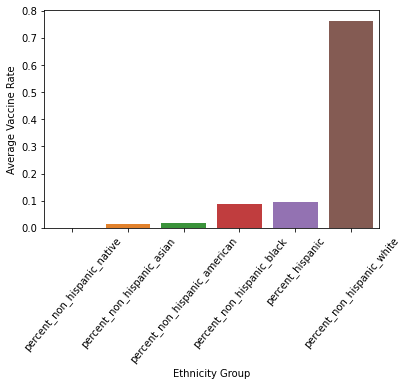

In [22]:
# Here I plot the average vaccination rates of ethnicity groups across the U.S. 
import seaborn as sns
ave_plot = sns.barplot(x="Ethnicity Group", y="Average Vaccine Rate", data=new_ave)
ave_plot = ave_plot.set_xticklabels(ave_plot.get_xticklabels(),rotation = 50)
ave_plot

In [24]:
# Here, I find the average vaccination rates of ethnicity groups grouped by the states
state_ave = hesitancy_df.groupby(['state']).mean()
state_ave = state_ave.reset_index()
state_ave['Total'] = state_ave.sum(axis = 1)
state_ave

,state,percent_hispanic,percent_non_hispanic_american,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,Total
0,ALABAMA,0.034864,0.005749,0.007072,0.287355,0.000269,0.648376,0.983685
1,ALASKA,0.053148,0.324583,0.053886,0.013293,0.005324,0.478703,0.928938
2,ARIZONA,0.313380,0.133180,0.013267,0.018427,0.001180,0.501993,0.981427
3,ARKANSAS,0.052561,0.005515,0.006661,0.160659,0.001171,0.751871,0.978437
4,CALIFORNIA,0.306224,0.017743,0.073066,0.029845,0.002805,0.537445,0.967128
5,COLORADO,0.201336,0.008911,0.011406,0.014298,0.000884,0.743475,0.980311
6,CONNECTICUT,0.120225,0.001725,0.037325,0.065438,0.000150,0.751225,0.976087
7,DELAWARE,0.087267,0.003533,0.028933,0.204867,0.000367,0.646633,0.971600
8,DISTRICT OF COLUMBIA,0.110000,0.002000,0.039300,0.454400,0.000400,0.365800,0.971900
9,FLORIDA,0.143778,0.003854,0.015804,0.141293,0.000661,0.673884,0.979273
